# Introduction
First of all: Hello Every one!

My name is Moein Verkiani but You will know me as Moligarch or **Kian**!
in this file we are going to do some hands-on ML exercise on iris dataset in order to learn more and practice what we learnt.

In [87]:
#prepare environment
%reset -f
import os
from sklearn import datasets, tree, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, LeaveOneOut,LeavePOut
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import io
from itertools import cycle 


iris_data = pd.read_csv('iris.csv')
iris = datasets.load_iris()
Xsk = iris['data']
ysk = iris['target']
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1" 

In [88]:
print(type(Xsk),Xsk.shape,type(ysk),ysk.shape)
#print(X,y)

<class 'numpy.ndarray'> (150, 4) <class 'numpy.ndarray'> (150,)


# Basic Statistics

In [89]:
#Calculate Features mean, with respect to kind of flower
X_arr=np.array(pd.DataFrame(Xsk , columns=iris['feature_names']))
setosa_mean = [np.mean(X_arr[:50, i]) for i in range(4)]
versicolor_mean = [np.mean(X_arr[50:100, i]) for i in range(4)]
virginica_mean = [np.mean(X_arr[100:150, i]) for i in range(4)]

spicies = {'setosa': setosa_mean, 'versicolor': versicolor_mean, 'virginica': virginica_mean}

Xmean_df = pd.DataFrame(spicies, index=['sepal length', 'sepal width', 'petal length', 'petal width'])
print('Features Mean\n',Xmean_df)

Features Mean
               setosa  versicolor  virginica
sepal length   5.006       5.936      6.588
sepal width    3.428       2.770      2.974
petal length   1.462       4.260      5.552
petal width    0.246       1.326      2.026


In [90]:
#Calculate Features Standard Deviation

setosa_std = [np.std(X_arr[:50, i]) for i in range(4)]
versicolor_std = [np.std(X_arr[50:100, i]) for i in range(4)]
virginica_std = [np.std(X_arr[100:150, i]) for i in range(4)]
X_std=[np.std(X_arr[:150, i]) for i in range(4)]
categ = {'Total':X_std, 'setosa': setosa_std, 'versicolor': versicolor_std, 'virginica': virginica_std}

Xstd_df=pd.DataFrame(categ, index=['sepal length', 'sepal width', 'petal length', 'petal width'])
print('Features Standard Deviation\n',Xstd_df)

Features Standard Deviation
                  Total    setosa  versicolor  virginica
sepal length  0.825301  0.348947    0.510983   0.629489
sepal width   0.434411  0.375255    0.310644   0.319255
petal length  1.759404  0.171919    0.465188   0.546348
petal width   0.759693  0.104326    0.195765   0.271890


In [91]:
#Calculate Features Variance

setosa_var = [np.var(X_arr[:50, i]) for i in range(4)]
versicolor_var = [np.var(X_arr[50:100, i]) for i in range(4)]
virginica_var = [np.var(X_arr[100:150, i]) for i in range(4)]
X_var=[np.var(X_arr[:150, i]) for i in range(4)]
categ = {'Total':X_var, 'setosa': setosa_var, 'versicolor': versicolor_var, 'virginica': virginica_var}

Xvar_df=pd.DataFrame(categ, index=['sepal length', 'sepal width', 'petal length', 'petal width'])
print('Features Variance\n',Xvar_df)

Features Variance
                  Total    setosa  versicolor  virginica
sepal length  0.681122  0.121764    0.261104   0.396256
sepal width   0.188713  0.140816    0.096500   0.101924
petal length  3.095503  0.029556    0.216400   0.298496
petal width   0.577133  0.010884    0.038324   0.073924


## Scale

In [92]:
scale = StandardScaler()

scaledX = scale.fit_transform(Xsk)
print(scaledX,scaledX.shape)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [93]:
print(type(iris_data))

<class 'pandas.core.frame.DataFrame'>


## Data Visualization

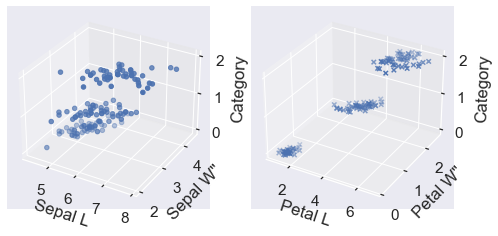

In [94]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))
# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

x1 = Xsk[:,0]
x2 = Xsk[:,1]

ax.scatter(x1, x2, ysk, marker='o')
ax.set_xlabel('Sepal L')
ax.set_ylabel('Sepal W"')
ax.set_zlabel('Category')
# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

x3 = Xsk[:,2]
x4 = Xsk[:,3]

ax.scatter(x3, x4, ysk, marker='x')
ax.set_xlabel('Petal L')
ax.set_ylabel('Petal W"')
ax.set_zlabel('Category')
plt.show()

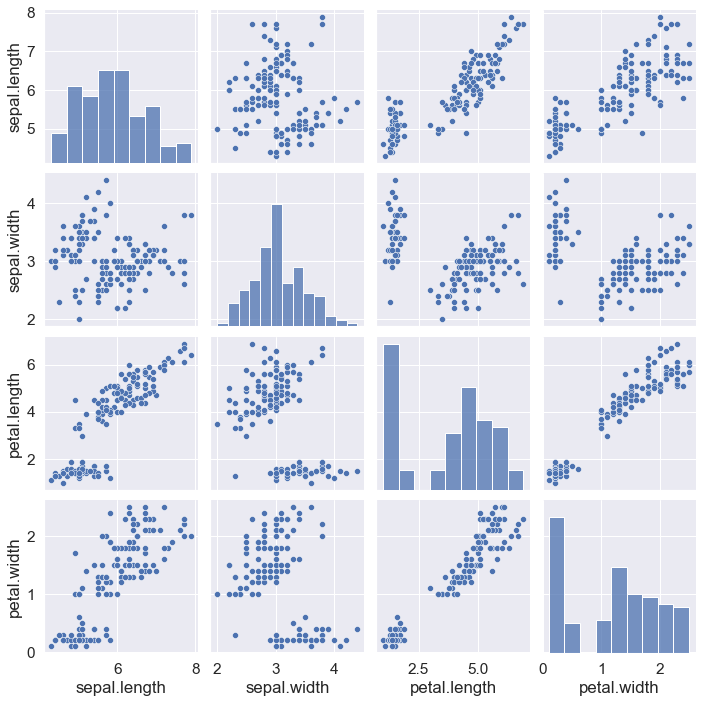

In [95]:
sn.pairplot(iris_data)

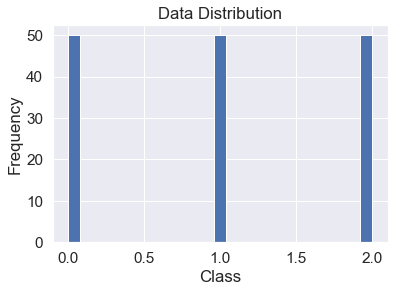

In [96]:
plt.hist(ysk, 25)
#plt.show()

plt.title("Data Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [97]:
dfStyler = iris_data.style.set_properties(**{'text-align': 'left'})
dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.100000,3.500000,1.400000,0.200000,Setosa
1,4.900000,3.000000,1.400000,0.200000,Setosa
2,4.700000,3.200000,1.300000,0.200000,Setosa
3,4.600000,3.100000,1.500000,0.200000,Setosa
4,5.000000,3.600000,1.400000,0.200000,Setosa
5,5.400000,3.900000,1.700000,0.400000,Setosa
6,4.600000,3.400000,1.400000,0.300000,Setosa
7,5.000000,3.400000,1.500000,0.200000,Setosa
8,4.400000,2.900000,1.400000,0.200000,Setosa
9,4.900000,3.100000,1.500000,0.100000,Setosa


In [98]:
iris_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [99]:
iris_data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [100]:
iris_data.shape

(150, 5)

# Classification
Classification in machine learning is the process of recognition, understanding, and grouping of objects and ideas into preset categories. It requires the use of machine learning algorithms that learn how to assign a class label to examples from the problem domain. There are many different types of classification tasks that you may encounter in machine learning and specialized approaches to modeling that may be used for each.


## Decision Tree

In [101]:
d = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
features=['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
Xtree = iris_data[features]
ytree = iris_data['variety'].map(d)

dfStyler = iris_data.style.set_properties(**{'text-align': 'left'})
dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
print(iris_data)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


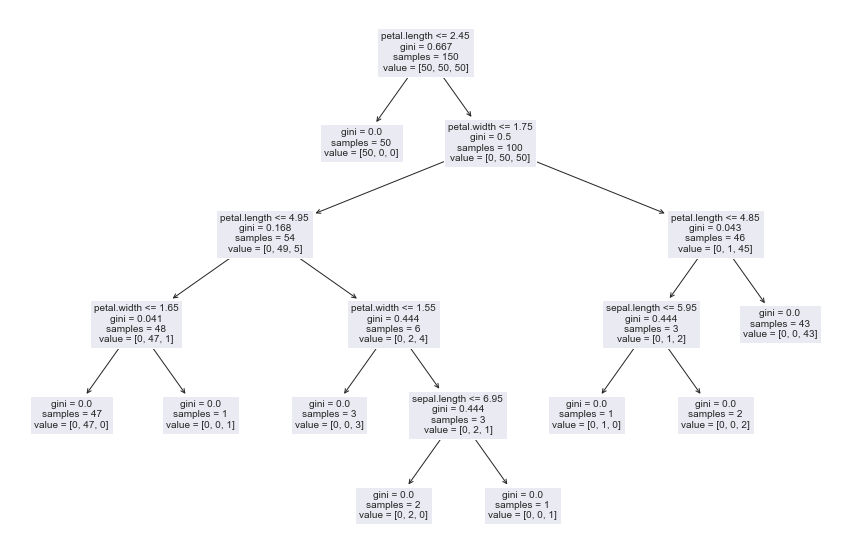

In [102]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(Xtree, ytree)

#Plot the tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree, feature_names=features, fontsize=10)
plt.show()

In [103]:
print(dtree.predict([[5.5, 4, 4, 1.5]]))

[1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


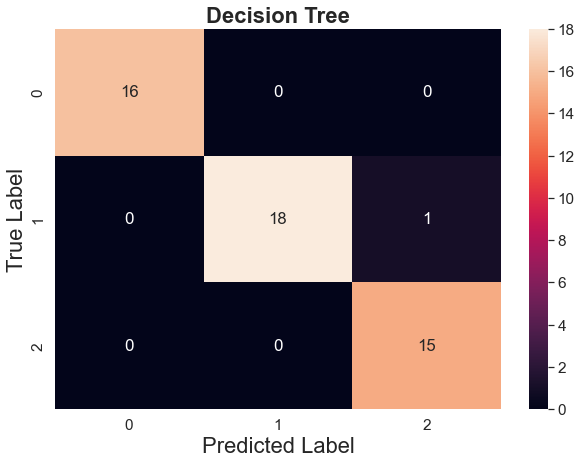

In [104]:
clf = tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(Xtree, ytree, test_size=0.33, random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

df_cfm = pd.DataFrame(cm, index = clf.classes_, columns = clf.classes_)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
plt.title("Decision Tree", fontsize = 22, fontweight="bold")
plt.xlabel("Predicted Label", fontsize = 22)
plt.ylabel("True Label", fontsize = 22)
sn.set(font_scale=1.4)
plt.show()

### AUC - ROC Curve

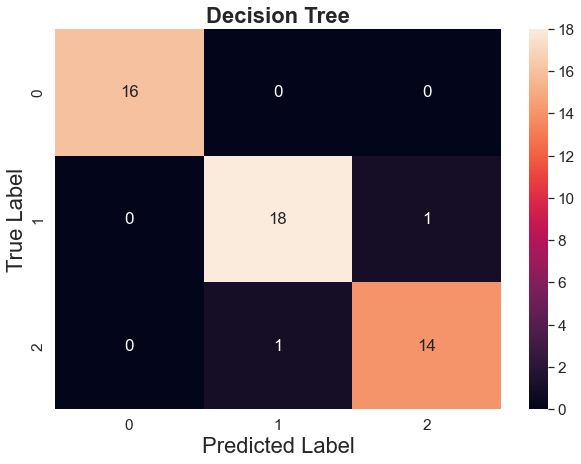

In [105]:
clf = tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(Xsk, ysk, test_size=0.33, random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

df_cfm = pd.DataFrame(cm, index = clf.classes_, columns = clf.classes_)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
plt.title("Decision Tree", fontsize = 22, fontweight="bold")
plt.xlabel("Predicted Label", fontsize = 22)
plt.ylabel("True Label", fontsize = 22)
sn.set(font_scale=1.4)
plt.show()

In [106]:
# Binarize the output
y = label_binarize(ysk, classes = clf.classes_)
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xsk, y, test_size=0.33, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    clf
)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

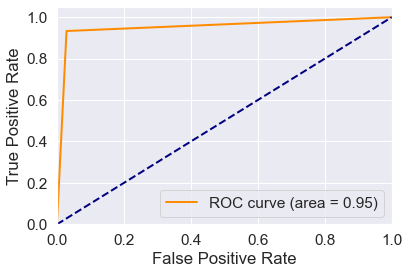

In [107]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()
#fig.savefig('curves.png')

### Cross Validation

In [108]:
# K-Fold Cross Validation 

clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, Xsk, ysk, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1.         1.         0.83333333 0.93333333 0.8       ]
Average CV Score:  0.9133333333333333
Number of CV Scores used in Average:  5


In [109]:
# Stratified K-Fold

clf = DecisionTreeClassifier(random_state=42)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, Xsk, ysk, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Average CV Score:  0.9533333333333334
Number of CV Scores used in Average:  5


In [110]:
#Leave One Out
X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

loo = LeaveOneOut()

scores = cross_val_score(clf, X, y, cv = loo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average CV Score:  0.94
Number of CV Scores used in Average:  150


In [111]:
clf = DecisionTreeClassifier(random_state=42)

lpo = LeavePOut(p=2)

scores = cross_val_score(clf, Xsk, ysk, cv = lpo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. ... 1. 1. 1.]
Average CV Score:  0.9382997762863534
Number of CV Scores used in Average:  11175


### Ensemble

In [112]:
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(Xtree, ytree, test_size = 0.25, random_state = 22)

dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.9210526315789473


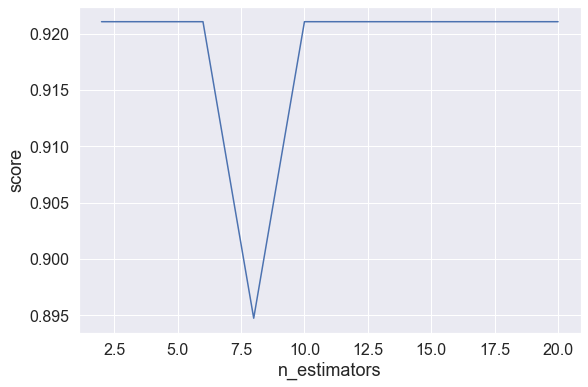

In [113]:
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(Xtree, ytree, test_size = 0.25, random_state = 22)

estimator_range = [2,4,6,8,10,12,14,16,18,20]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

[Text(0.375, 0.9, 'petal.length <= 2.45\ngini = 0.661\nsamples = 71\nvalue = [35, 44, 33]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 23\nvalue = [35, 0, 0]'),
 Text(0.5, 0.7, 'petal.width <= 1.7\ngini = 0.49\nsamples = 48\nvalue = [0, 44, 33]'),
 Text(0.25, 0.5, 'petal.length <= 5.0\ngini = 0.044\nsamples = 26\nvalue = [0, 43, 1]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 24\nvalue = [0, 42, 0]'),
 Text(0.375, 0.3, 'sepal.length <= 6.15\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.5, 'petal.length <= 4.85\ngini = 0.059\nsamples = 22\nvalue = [0, 1, 32]'),
 Text(0.625, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 32]')]

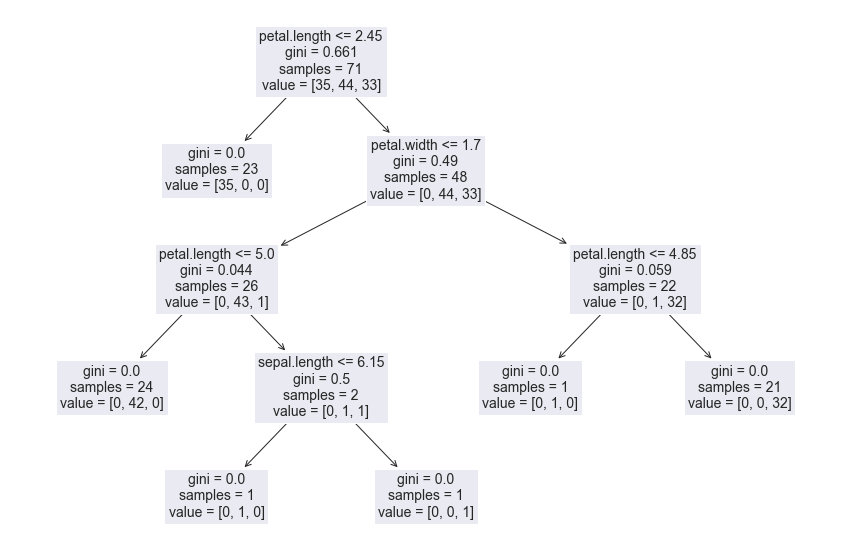

In [114]:
X_train, X_test, y_train, y_test = train_test_split(Xtree, ytree, test_size = 0.25, random_state = 22)

clf = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

clf.fit(X_train, y_train)

plt.figure(figsize=(15, 10))

plot_tree(clf.estimators_[0], feature_names = features, fontsize=14)

## SVM

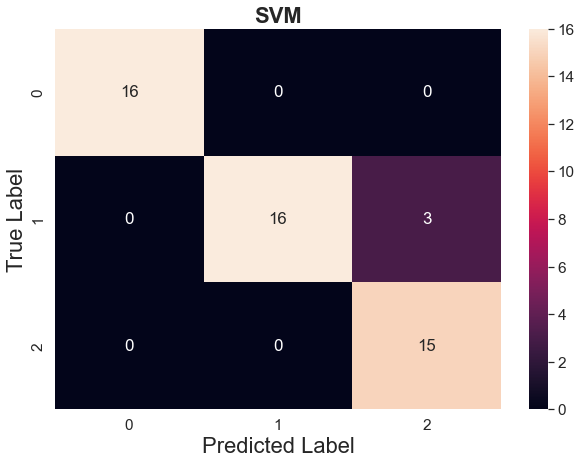

In [115]:
clf = svm.LinearSVC(max_iter=3080)
X_train, X_test, y_train, y_test = train_test_split(Xtree, ytree, test_size = 0.33, random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

df_cfm = pd.DataFrame(cm, index = clf.classes_, columns = clf.classes_)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
plt.title("SVM", fontsize = 22, fontweight="bold")
plt.xlabel("Predicted Label", fontsize = 22)
plt.ylabel("True Label", fontsize = 22)
sn.set(font_scale=1.4)
plt.show()

In [116]:
#report = classification_report(y_test, predictions, target_names = clf.classes_, labels=clf.classes_, zero_division = 0, output_dict=True)
#df = pd.DataFrame(report).transpose()
#df.to_csv("Report_SVM.csv")

## Random Forest

In [117]:
clf = RandomForestClassifier()

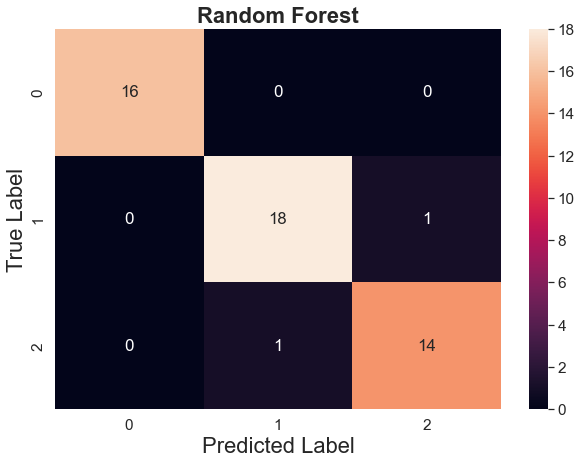

In [118]:
X_train, X_test, y_train, y_test = train_test_split(Xtree, ytree, test_size=0.33, random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

df_cfm = pd.DataFrame(cm, index = clf.classes_, columns = clf.classes_)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
plt.title("Random Forest", fontsize = 22, fontweight="bold")
plt.xlabel("Predicted Label", fontsize = 22)
plt.ylabel("True Label", fontsize = 22)
sn.set(font_scale=1.4)
plt.show()

In [119]:
#report = classification_report(y_test, predictions, target_names = clf.classes_, labels=clf.classes_, zero_division = 0, output_dict=True)
#df = pd.DataFrame(report).transpose()
#df.to_csv("Report_RF.csv") 

## Logistic Regression 

### Grid Search

In [120]:
logit = LogisticRegression(max_iter = 10000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in C:
  logit.set_params(C=choice)
  logit.fit(Xsk, ysk)
  scores.append(logit.score(Xsk, ysk))

print(scores)

[0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667]


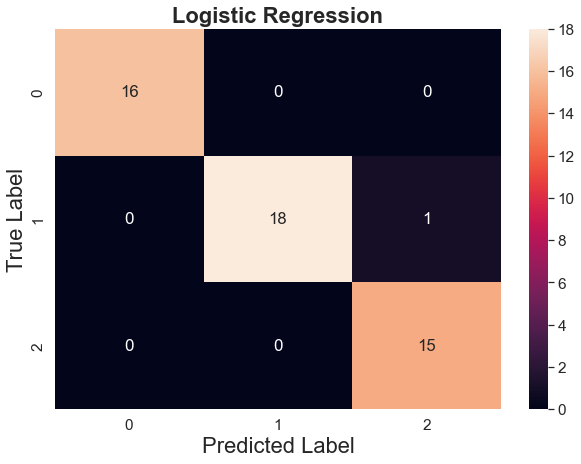

In [121]:
clf = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(Xtree, ytree, test_size=0.33, random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

df_cfm = pd.DataFrame(cm, index = clf.classes_, columns = clf.classes_)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
plt.title("Logistic Regression", fontsize = 22, fontweight="bold")
plt.xlabel("Predicted Label", fontsize = 22)
plt.ylabel("True Label", fontsize = 22)
sn.set(font_scale=1.4)
plt.show()

In [122]:
#report = classification_report(y_test, predictions, target_names = clf.classes_, labels=clf.classes_, zero_division = 0, output_dict=True)
#df = pd.DataFrame(report).transpose()
#df.to_csv("Report_LR.csv") 

## Gaussian Naïve Bays

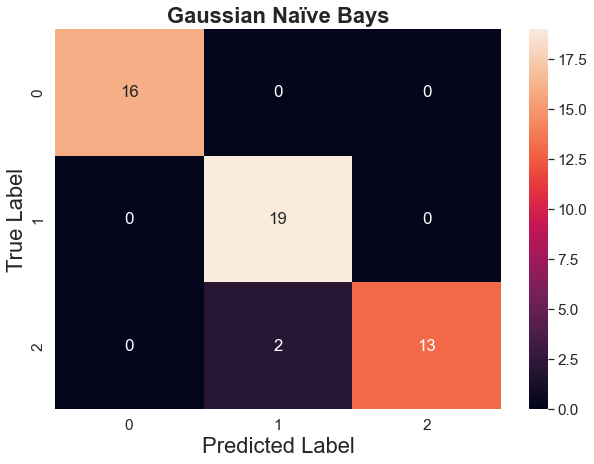

In [123]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(Xtree, ytree, test_size=0.33, random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

df_cfm = pd.DataFrame(cm, index = clf.classes_, columns = clf.classes_)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
plt.title("Gaussian Naïve Bays", fontsize = 22, fontweight="bold")
plt.xlabel("Predicted Label", fontsize = 22)
plt.ylabel("True Label", fontsize = 22)
sn.set(font_scale=1.4)
plt.show()

In [124]:
#report = classification_report(y_test, predictions, target_names = clf.classes_, labels=clf.classes_, zero_division = 0, output_dict=True)
#df = pd.DataFrame(report).transpose()
#df.to_csv("Report_GNB.csv") 

## KNN

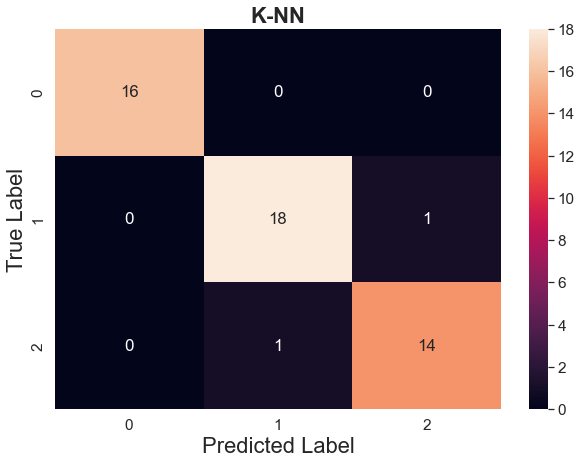

In [125]:
clf = KNeighborsClassifier(n_neighbors=1,)
X_train, X_test, y_train, y_test = train_test_split(Xtree, ytree, test_size =0.33, random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

df_cfm = pd.DataFrame(cm, index = clf.classes_, columns = clf.classes_)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
plt.title("K-NN", fontsize = 22, fontweight="bold")
plt.xlabel("Predicted Label", fontsize = 22)
plt.ylabel("True Label", fontsize = 22)
sn.set(font_scale=1.4)
plt.show()

In [126]:
#report = classification_report(y_test, predictions, target_names = clf.classes_, labels=clf.classes_, zero_division = 0, output_dict=True)
#df = pd.DataFrame(report).transpose()
#df.to_csv("Report_KNN.csv") 

# Hierarchical Clustering

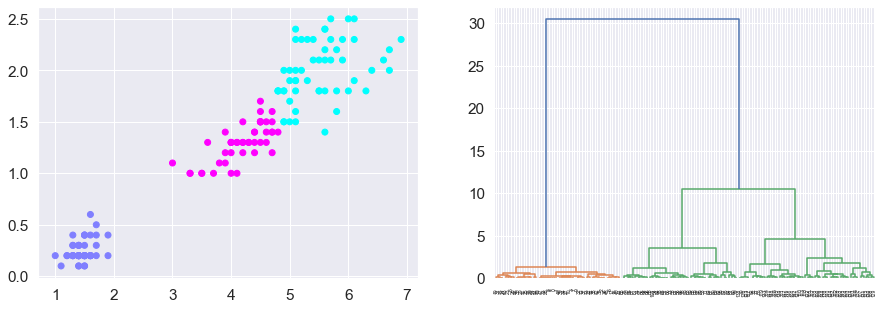

In [127]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
fig = plt.figure(figsize=(15,5))


data_to_analyze = iris_data[['petal.length', 'petal.width']]

# =============
# First subplot
# =============

ax = fig.add_subplot(1, 2, 1)
groups = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
groups.fit_predict(data_to_analyze)
plt.scatter(iris_data['petal.length'] ,iris_data['petal.width'], c= groups.labels_, cmap='cool')


# =============
# Secound subplot
# =============

ax = fig.add_subplot(1, 2, 2)
data_to_analyze = list(zip(iris_data['petal.length'], iris_data['petal.width']))
linkage_data = linkage(data_to_analyze, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

## K-means

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


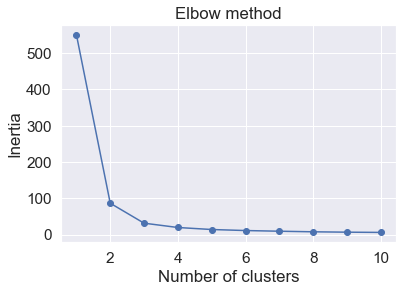

In [128]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_to_analyze)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

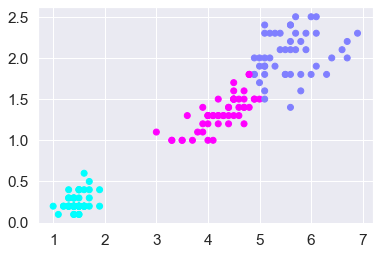

In [129]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_to_analyze)

plt.scatter(iris_data['petal.length'], iris_data['petal.width'], c=kmeans.labels_, cmap='cool')
plt.show()